In [20]:
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics 
import sys 
!{sys.executable} -m pip install heartpy
import heartpy as hp
from sklearn import preprocessing
from heartpy.filtering import filter_signal

ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "C:\Anaconda3\envs\JupyterTest\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "C:\Anaconda3\envs\JupyterTest\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Anaconda3\envs\JupyterTest\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "C:\Anaconda3\envs\JupyterTest\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Anaconda3\envs\JupyterTest\lib

In [21]:
RawData1 = sio.loadmat( 'C:/4th_2endSemester/MLBRLab/BPEstimation/data/Part_1.mat' )
#RawData3 = sio.loadmat( 'C:/4th_2endSemester/MLBRLab/BPEstimation/data/Part_3.mat' )
#RawData4 = sio.loadmat( 'C:/4th_2endSemester/MLBRLab/BPEstimation/data/Part_4.mat' )

In [22]:
RearrangedData = { 'SamplingRate':125.0 , 'ppg' : [] , 'diff1ppg' : [] , 'diff2ppg' : [] , 'abp' : [] }

In [23]:
def GetPPG_1():
    for i in range( len(RawData1['Part_1'][0][0:10]) ):
        #Low pass filter
        N = len(RawData1['Part_1'][0][i][0])
        t = np.linspace( 0 , N , N )
        F = t*RearrangedData['SamplingRate']/N - RearrangedData['SamplingRate']/2
        yf = np.fft.fft( RawData1['Part_1'][0][i][0] )
        yf = np.fft.fftshift( yf )
        for i in range( N ):
            if ( F[i] > 10 ) | ( F[i] < -10 ):
                yf[i] = 0
        iyf = np.abs( np.fft.ifft( yf ) )

        #Nomarlization
        iyf = ( iyf - np.min(iyf) ) / ( max(iyf) - min(iyf) )
        RearrangedData['ppg'].append( iyf )

    #RearrangedData['ppg'] = np.array( RearrangedData['ppg'] )
    return
def GetabpRawData_1():
    for i in range( len(RawData1['Part_1'][0][0:10]) ):
        RearrangedData['abp'].append( RawData1['Part_1'][0][i][1] )
    return



def GetPPG_3():
    for i in range( len(RawData3['Part_3'][0]) ):
        #Low pass filter
        N = len(RawData3['Part_3'][0][i][0])
        t = np.linspace( 0 , N , N )
        F = t*RearrangedData['SamplingRate']/N - RearrangedData['SamplingRate']/2
        yf = np.fft.fft( RawData3['Part_3'][0][i][0] )
        yf = np.fft.fftshift( yf )
        for i in range( N ):
            if ( F[i] > 10 ) | ( F[i] < -10 ):
                yf[i] = 0
        iyf = np.abs( np.fft.ifft( yf ) )

        #Nomarlization
        iyf = ( iyf - np.min(iyf) ) / ( max(iyf) - min(iyf) )
        RearrangedData['ppg'].append( iyf )

    return

def GetabpRawData_3():
    for i in range( len(RawData3['Part_3'][0]) ):
        RearrangedData['abp'].append( RawData3['Part_3'][0][i][1] )
    return


def GetPPG_4():
    for i in range( len(RawData4['Part_4'][0]) ):
        #Low pass filter
        N = len(RawData4['Part_4'][0][i][0])
        t = np.linspace( 0 , N , N )
        F = t*RearrangedData['SamplingRate']/N - RearrangedData['SamplingRate']/2
        yf = np.fft.fft( RawData4['Part_4'][0][i][0] )
        yf = np.fft.fftshift( yf )
        for i in range( N ):
            if ( F[i] > 10 ) | ( F[i] < -10 ):
                yf[i] = 0
        iyf = np.abs( np.fft.ifft( yf ) )

        #Nomarlization
        iyf = ( iyf - np.min(iyf) ) / ( max(iyf) - min(iyf) )
        RearrangedData['ppg'].append( iyf )

    return

def GetabpRawData_4():
    for i in range( len(RawData4['Part_4'][0]) ):
        RearrangedData['abp'].append( RawData4['Part_4'][0][i][1] )
    return


def GetPPG_Diff():
    for i in range( len(RearrangedData['ppg']) ):
        diff1 = []
        diff2 = []
        #Get and Filter 1st derivative ppg
        for j in range( 1 , len(RearrangedData['ppg'][i]) , 1 ):
            diff1.append( RearrangedData['ppg'][i][j] - RearrangedData['ppg'][i][j-1] )
        #diff1 = filter_signal( diff1 , cutoff = [ 0.5 , 4 ] , sample_rate = 125.0 , order = 4 , filtertype = 'bandpass' )

        for k in range( 1 , len(diff1) , 1 ):
            diff2.append( diff1[k] - diff1[k-1] )
        #diff2 = filter_signal( diff2 , cutoff = [ 0.5 , 4 ] , sample_rate = 125.0 , order = 4 , filtertype = 'bandpass' )
        RearrangedData['diff1ppg'].append( diff1 )
        RearrangedData['diff2ppg'].append( diff2 )
            


    return
GetPPG_1()
GetabpRawData_1()
#GetPPG_3()
#GetabpRawData_3()
#GetPPG_4()
#GetabpRawData_4()
GetPPG_Diff()

In [24]:
AttributeTable = { 'systolicIndex': [] , 'systolicValue': [] , 'hr': [] , 'valleyIndex0': [] , 'valleyValue0': [] , 'maxSlopeIndex': [] , 'maxSlopeValue': [] , 'minSlopeIndex' : [] , 'minSlopeValue' : [] , 'peakValue1st': [] , 'valleyValue1st' : [] ,  'DicroticIndex': [] , 'DicroticValue':[] , 'sbp' : [] , 'dbp' : [] }

In [25]:
def get_peakIndex_and_peakValue_ofppg( startIndex , endIndex ):
    for i in range( startIndex , endIndex , 1 ):
        #get peak index of ppg
        #temp = []
        working_data, measures = hp.process(RearrangedData['ppg'][i], 125.0)
        AttributeTable['systolicIndex'].append( np.setdiff1d( working_data['peaklist'] , working_data['removed_beats'] ) )
        temp = []
        for j in range( len(AttributeTable['systolicIndex'][i]) ):
            temp.append( RearrangedData['ppg'][i][AttributeTable['systolicIndex'][i][j]] ) 
        temp = np.array( temp )
        AttributeTable['systolicValue'].append(temp)
    return
get_peakIndex_and_peakValue_ofppg(0, 10)

In [26]:
def Get_ValleyandHr():
    for x in range( len(AttributeTable['systolicIndex']) ):

        #Find the valleyIndex0 and valleyValue0
        minIndex = []
        minList = []
        for i in range( 1 , len(AttributeTable['systolicIndex'][x]) , 1 ):
            tempIndex = 0
            tempMin = 3
            for j in range( AttributeTable['systolicIndex'][x][i-1] ,  AttributeTable['systolicIndex'][x][i] , 1 ):
                if RearrangedData['ppg'][x][j] < tempMin:
                    tempIndex = j
                    tempMin = RearrangedData['ppg'][x][j]
            minIndex.append( tempIndex )
            minList.append( tempMin )
        minIndex = np.array( minIndex )
        minList = np.array( minList )
        AttributeTable['valleyIndex0'].append( minIndex )
        AttributeTable['valleyValue0'].append( minList )

        #Get hr 
        temphr = []
        for i in range( 1 , len( AttributeTable['valleyIndex0'][x] ) , 1 ):
            temphr.append( 60*125 / ( AttributeTable['valleyIndex0'][x][i] - AttributeTable['valleyIndex0'][x][i-1] ) )
        temphr = np.array( temphr )
        AttributeTable['hr'].append( temphr )    

    return

Get_ValleyandHr()

In [27]:
def Get_MaxSlopeandDicroticNotch():
    for x in range( len(AttributeTable['valleyIndex0']) ):
        maxSlopeIndexList = []
        maxSlopeValueList = []
        minSlopeIndexList = []
        minSlopeValueList = []
        peakValue1stList = []
        valleyValue1stList = []
        DicroticIndexList = []
        DicroticValueList = []
        for i in range( 1 , len( AttributeTable['valleyIndex0'][x] ) , 1 ):
            maxSlope = -100
            maxSlopeIndex = 0
            minSlope = 100
            minSlopeIndex = 0
            for j in range( AttributeTable['valleyIndex0'][x][i-1] , AttributeTable['valleyIndex0'][x][i] , 1 ):
                if RearrangedData['diff1ppg'][x][j] > maxSlope:
                    maxSlope = RearrangedData['diff1ppg'][x][j]
                    maxSlopeIndex = j 
            for j in range( AttributeTable['systolicIndex'][x][i] , int((AttributeTable['valleyIndex0'][x][i] + AttributeTable['systolicIndex'][x][i])/2) , 1 ):
                if RearrangedData['diff1ppg'][x][j] < minSlope:
                    minSlope = RearrangedData['diff1ppg'][x][j]
                    minSlopeIndex = j 
            maxSlopeIndexList.append( maxSlopeIndex )
            maxSlopeValueList.append( RearrangedData['ppg'][x][maxSlopeIndex] )
            minSlopeIndexList.append( minSlopeIndex )
            minSlopeValueList.append( RearrangedData['ppg'][x][minSlopeIndex] )
            peakValue1stList.append( maxSlope )
            valleyValue1stList.append( minSlope )


            maxdiff2 = -100
            maxdiff2Index = 0
            for k in range( minSlopeIndexList[i-1] , AttributeTable['valleyIndex0'][x][i] , 1 ):
                if RearrangedData['diff2ppg'][x][k-5] > maxdiff2:
                    maxdiff2 = RearrangedData['diff2ppg'][x][k-5]
                    maxdiff2Index = k 
            DicroticIndexList.append( maxdiff2Index )
            DicroticValueList.append( RearrangedData['ppg'][x][maxdiff2Index] )

                



        maxSlopeIndexList = np.array( maxSlopeIndexList )
        maxSlopeValueList = np.array( maxSlopeValueList )
        minSlopeIndexList = np.array( minSlopeIndexList )
        minSlopeValueList = np.array( minSlopeValueList )
        peakValue1stList = np.array( peakValue1stList )
        valleyValue1stList = np.array( valleyValue1stList )
        DicroticIndexList = np.array( DicroticIndexList )
        DicroticValueList = np.array( DicroticValueList )

        AttributeTable['maxSlopeIndex'].append( maxSlopeIndexList )
        AttributeTable['maxSlopeValue'].append( maxSlopeValueList )
        AttributeTable['minSlopeIndex'].append( minSlopeIndexList )
        AttributeTable['minSlopeValue'].append( minSlopeValueList )
        AttributeTable['peakValue1st'].append( peakValue1stList )
        AttributeTable['valleyValue1st'].append( valleyValue1stList )
        AttributeTable['DicroticIndex'].append( DicroticIndexList )
        AttributeTable['DicroticValue'].append( DicroticValueList )

        
    return

Get_MaxSlopeandDicroticNotch()

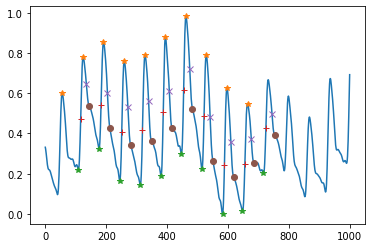

In [28]:
y = 7
Test = RearrangedData['ppg'][y]
t = np.linspace( 0 , len(Test) , len(Test) )

plt.plot( t[0:1000] , Test[0:1000] )
plt.plot( AttributeTable['systolicIndex'][y][0:10] , AttributeTable['systolicValue'][y][0:10]  , '*')
plt.plot( AttributeTable['valleyIndex0'][y][0:10] , AttributeTable['valleyValue0'][y][0:10]  , '*')
plt.plot( AttributeTable['maxSlopeIndex'][y][0:10] , AttributeTable['maxSlopeValue'][y][0:10] , '+' )
plt.plot( AttributeTable['minSlopeIndex'][y][0:10] , AttributeTable['minSlopeValue'][y][0:10] , 'x' )
plt.plot( AttributeTable['DicroticIndex'][y][0:10] , AttributeTable['DicroticValue'][y][0:10] , 'o' )

In [29]:
def Getbp():
    for x in range( len(AttributeTable['valleyIndex0']) ):

        minList = []
        maxList = []
        for i in range( 1 , len( AttributeTable['valleyIndex0'][x] ) , 1 ):
            max = -100
            min = 100
            start = AttributeTable['valleyIndex0'][x][i-1]
            end = AttributeTable['valleyIndex0'][x][i]
            for j in range( start , end , 1 ):
                if RearrangedData['abp'][x][j] > max:
                    max = RearrangedData['abp'][x][j]
                if RearrangedData['abp'][x][j] < min:
                    min = RearrangedData['abp'][x][j]
            minList.append( min )
            maxList.append( max )
        minList = np.array( minList )
        maxList = np.array( maxList )
        AttributeTable['dbp'].append( minList )
        AttributeTable['sbp'].append( maxList )


    return
Getbp()

In [30]:
Features = []
BP = []

AttributeTable = { 'systolicIndex': [] , 'systolicValue': [] , 'hr': [] , 'valleyIndex0': [] , 'valleyValue0':[] , 'maxSlopeIndex': [] , 'maxSlopeValue': [] , 'minSlopeIndex' : [] , 'minSlopeValue' : [] , 'peakValue1st': [] , 'valleyValue1st' : [] ,  'DicroticIndex': [] , 'DicroticValue':[] }

In [31]:
def GetFeatures():
    for x in range( len(AttributeTable['valleyIndex0']) ):
        featuresofp = []
        bpofp = []

        #extremely abnormal patient
        avghr = np.mean( AttributeTable['hr'][x] )
        if ( avghr > 200 ) or ( avghr < 30 ):
            continue
        
        for i in range( 1 , len(AttributeTable['valleyIndex0'][x]) , 1 ):
            temp = []
            bp = []
            avghr = np.mean( AttributeTable['hr'][x] )
            hr = AttributeTable['hr'][x][i-1]
            sbp = AttributeTable['sbp'][x][i-1]
            dbp = AttributeTable['dbp'][x][i-1]
            pm = sbp - dbp
            DO = AttributeTable['valleyIndex0'][x][i] - AttributeTable['DicroticIndex'][x][i-1]

            if ( hr > (1.3*avghr) ) or ( hr < (avghr/1.3) ) or ( hr > 200 ) or ( hr < 20 ) or ( sbp > 300) or ( dbp < 20 ) or ( pm < 30 ) or ( pm > 200 ) or ( DO < 5 ):
                continue
    
            else: 
                I1 = AttributeTable['valleyIndex0'][x][i-1]
                I2 = AttributeTable['maxSlopeIndex'][x][i-1]
                I3 = AttributeTable['systolicIndex'][x][i]
                I4 = AttributeTable['DicroticIndex'][x][i-1]
                I5 = AttributeTable['valleyIndex0'][x][i]
                t1 = 125*60 / ( I2 - I1 )
                t2 = 125*60 / ( I3 - I2 )
                t3 = 125*60 / ( I4 - I3 )
                t4 = 125*60 / ( I5 - I4 )
                s1 = np.sum( RearrangedData['ppg'][x][I1:I2] )
                s2 = np.sum( RearrangedData['ppg'][x][I2:I3] )
                s3 = np.sum( RearrangedData['ppg'][x][I3:I4] )
                s4 = np.sum( RearrangedData['ppg'][x][I4:I5] )
                rsd = ( t1 + t2 + t3 ) / t4 # ratio of systolic duration to diastolic duration
                rsc = ( t1 + t2 + t3 ) / hr #ratio of systolic duration to cardiac cycle
                rdc = t4 / hr #ratio of diastolic duration to cardiac cyccle
                rad = ( s1 + s2 ) / ( s3 + s4 ) #ratio of ascending area to descending area

                onv = AttributeTable['valleyValue0'][x][i-1] #onset valley value
                maxslopev = AttributeTable['peakValue1st'][x][i-1]#max value of 1st diff of ppg
                speak = AttributeTable['systolicValue'][x][i] #systolic value
                minslopev = AttributeTable['valleyValue1st'][x][i-1]#min value of 1st diff of ppg
                dv = AttributeTable['DicroticValue'][x][i-1]#value of dicrotic notch
                ai = dv / speak #augmentation Index
                pir = onv / speak#p intensity ratio
                nnratio = minslopev / maxslopev

                temp.append( hr )
                temp.append( t1 )
                temp.append( t2 )
                temp.append( t3 )
                temp.append( t4 )
                temp.append( s1 )
                temp.append( s2 )
                temp.append( s3 )
                temp.append( s4 )
                temp.append( rsd )
                temp.append( rsc )
                temp.append( rdc )
                temp.append( rad )
                temp.append( onv )
                temp.append( maxslopev )
                temp.append( speak )
                temp.append( minslopev )
                temp.append( dv )
                temp.append( ai )
                temp.append( pir )
                temp.append( nnratio )
                temp = np.array( temp )
                bp.append( sbp )
                bp.append( dbp )
                bp = np.array( bp )
                featuresofp.append( temp )
                bpofp.append( bp )

        featuresofp = np.array( featuresofp )
        bpofp = np.array( bpofp )

        Features.append( featuresofp )
        BP.append( bpofp )

    return

GetFeatures()

In [36]:
len(Features)
print(len(Features[0][1]))
print(Features[0])

21
[[ 1.20967742e+02  1.07142857e+03  8.33333333e+02 ...  5.52950026e-01
   3.78281633e-01 -4.85096319e-01]
 [ 1.20967742e+02  9.37500000e+02  9.37500000e+02 ...  5.38158796e-01
   3.85182055e-01 -4.99133446e-01]
 [ 1.22950820e+02  9.37500000e+02  9.37500000e+02 ...  5.60948158e-01
   3.74444342e-01 -4.44137476e-01]
 ...
 [ 1.20967742e+02  1.07142857e+03  8.33333333e+02 ...  5.29873137e-01
   3.86066028e-01 -4.86800731e-01]
 [ 1.22950820e+02  1.07142857e+03  8.33333333e+02 ...  5.30131006e-01
   3.67949081e-01 -5.00974374e-01]
 [ 1.20967742e+02  1.07142857e+03  8.33333333e+02 ...  4.99945294e-01
   3.70095570e-01 -5.07778158e-01]]


Features = np.array( Features )
BP = np.array( BP )

np.save( 'C:/4th_2endSemester/MLBRLab/BPEstimation/data/Features.npy' , Features )
np.save( 'C:/4th_2endSemester/MLBRLab/BPEstimation/data/BP.npy' , BP )